In [1]:
library(dplyr)
library(ggplot2)
library(qvalue)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/"

In [3]:
########## MOFA 1
# results when using only the first MOFA component as cell context
file0 = paste0(mydir, "MOFA1/new4/summary.csv")
df0 = read.csv(file0, row.names=1)
nrow(df0)
head(df0,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.3328208357,16_81118466_A_G,0.3328208357
1,ENSG00000011523_CEP68,2,2,0.0004224424,2_65279223_C_T,0.0008448849


In [4]:
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue
# significant eQTLs (FDR<5%)
nrow(df0[df0$qv<0.05,]) 
# significant eGenes (FDR<5%)
length(unique(df0[df0$qv<0.05,"gene"]))

[1] 239

[1] 183

In [5]:
########## MOFA 1:10
# results when using MOFA components 1-10 as cell context
file1 = paste0(mydir, "MOFA10/new4/summary.csv")
df1 = read.csv(file1, row.names=1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,16,0.02606257,16_81118466_A_G,0.02606257
1,ENSG00000011523_CEP68,2,2,0.03995225,2_65279223_C_T,0.07990451


In [6]:
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
# significant eQTLs (FDR<5%)
nrow(df1[df1$qv<0.05,])
# significant eGenes (FDR<5%)
length(unique(df1[df1$qv<0.05,"gene"]))

[1] 411

[1] 315

In [7]:
df2 = inner_join(df0, df1, by = c("gene","chrom","n_snps","snpID"), suffix = c(".1",".10"))
nrow(df2)

[1] 4470

In [8]:
length(unique(df2$gene))

[1] 3240

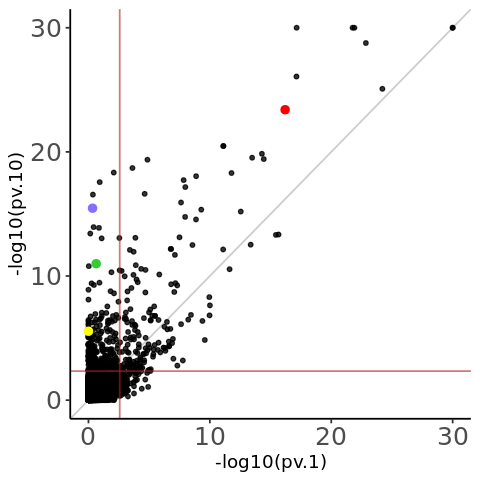

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4) 
df2[as.numeric(df2$pv.10) < 10^-30,"pv.10"] = 10^-30
df2[as.numeric(df2$pv.1) < 10^-30,"pv.1"] = 10^-30
m = -log10(min(min(df2$pv.1),min(df2$pv.10)))
p = ggplot(df2, aes(x = -log10(pv.1), y = -log10(pv.10))) + geom_point(size = 1, alpha = 0.8) 
p = p + theme_bw() + geom_abline(alpha=0.2) + xlim(c(0,m)) + ylim(c(0,m))
p1 = max(df2[df2$qv.1<0.05,"pv.1"])
q1 = -log10(p1)
p10 = max(df2[df2$qv.10<0.05,"pv.10"])
q10 = -log10(p10)
p = p + geom_vline(xintercept=q1, alpha=0.6, col="firebrick") + geom_hline(yintercept=q10, alpha=0.6, col="firebrick")
p = p + geom_point(aes(x=-log10(pv.1),y=-log10(pv.10)),data=df2[grep("6_30639412_A_G",df2$snpID),],col="red",size=2)
p = p + geom_point(aes(x=-log10(pv.1),y=-log10(pv.10)),data=df2[grep("12_75737206_G_A",df2$snpID),],col="lightslateblue",size=2)
p = p + geom_point(aes(x=-log10(pv.1),y=-log10(pv.10)),data=df2[grep("6_31785228_G_C",df2$snpID),],col="yellow",size=2)
p = p + geom_point(aes(x=-log10(pv.1),y=-log10(pv.10)),data=df2[grep("7_73258087_T_A",df2$snpID),],col="limegreen",size=2)
p + theme_classic() + theme(axis.text.x = element_text(size = 15),axis.text.y = element_text(size = 15))